In [50]:
import numpy as np
from scipy.stats import chi2
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import norm
from scipy.optimize import minimize
from tqdm.notebook import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from sklearn.utils import resample

# Пункт а)

In [51]:
arr = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
n = np.sum(arr)
values = np.array([i for i in range(10)])
values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
def prefix_sum(x):
    for i in range(1, 10):
        x[i] += x[i-1]
    return x

delta = 1.4000000000000001
p-value = 0.03348


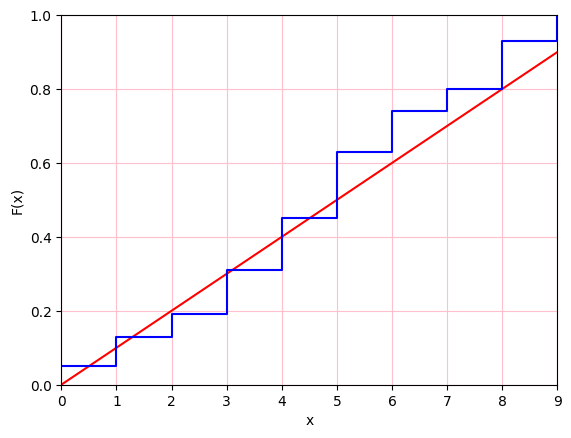

In [53]:
y_uniform = values/10
y_prefix = prefix_sum(arr / 100)

plt.axis([0, 9, 0, 1])
plt.ylabel('F(x)')
plt.xlabel('x')

plt.plot(values, y_uniform, color='red')
plt.step(values, y_prefix, where='post', color='blue')
plt.grid(which='major', axis='both', color='pink')
    
arr_delta1 = np.abs(y_uniform - y_prefix)
arr_delta2 = np.zeros_like(arr_delta1)
arr_delta2[1:] = abs(y_uniform[1:10] - y_prefix[0:9])
sup1 = max(arr_delta1)
sup2 = max(arr_delta2)
sup = max(sup1, sup2)
print("delta =", np.sqrt(n) * sup)

print("p-value = 0.03348")  # из таблицы

# Пункт b)

In [54]:
intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]
counts = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]
data = []
for (start, end), count in zip(intervals, counts):
    midpoint = (start + end) / 2
    data.extend([midpoint] * count)
initial_params = [np.mean(data), np.std(data)]

In [55]:
def likelihood(params):
    mu, sigma = params[0], params[1]
    if sigma <= 0:
        return np.inf
    return -np.sum(norm.logpdf(data, mu, sigma))

In [56]:
result = minimize(likelihood, initial_params, method='L-BFGS-B', bounds=[(-np.inf, np.inf), (0, np.inf)])
mu, sigma = result.x
print(f'Myu: {mu}')
print(f'Sigma: {sigma}')

Myu: 5.27
Sigma: 2.505414137423193


In [57]:
def f(x):
    global sigma, mu
    return norm.pdf(x, mu, sigma)

integral_intervals = [-np.inf, 1, 2, 3, 4, 5, 6, 7, 8, 9, np.inf]
p = np.array([integrate.quad(f, integral_intervals[i-1], integral_intervals[i])[0] for i in range(1, 11)])
print(f"P_i * n: {p*100}")

P_i * n: [ 4.41616821  5.17552151  8.65410163 12.36537988 15.09787008 15.75250246
 14.04461048 10.7002627   6.96626253  6.82732051]


In [58]:
delta = np.sum((counts - p * n) ** 2 / (p * n))
print("delta~ =", delta)

delta~ = 10.798973140500925


In [59]:
def f(x):
    return chi2.pdf(x, 7)

answer = integrate.quad(f, delta, np.inf)[0]
print(f"p-value = {answer}")

p-value = 0.14763126040115765


# Bootstrap

In [60]:
data = np.array(([0] * 5 + [1] * 8 + [2] * 6 + [3] * 12 + [4] * 14 + [5] * 18 + [6] * 11 + [7] * 6 + [8] * 13 + [9] * 7))
N = len(data)

In [61]:
# ~F(x) - emperical fuction
counts = np.array([np.count_nonzero(data == i) for i in range(10)])
probabilities = counts / counts.sum()
F_ = np.cumsum(probabilities)

In [62]:
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
F = norm.cdf(values, mu, sigma)

In [63]:
arr_delta1 = np.abs(F_ - F)
arr_delta2 = np.zeros_like(arr_delta1)
arr_delta2[1:] = abs(F_[1:10] - F[0:9])
sup1 = max(arr_delta1)
sup2 = max(arr_delta2)
sup = max(sup1, sup2)

delta = np.sqrt(n) * sup
print("Delta =", np.sqrt(n) * sup)

Delta = 3.2388828767538627


In [64]:
# Bootstrap
B = 50000
bootstrap_arr = []
N_ = len(data)
for _ in range(B):
    sample = resample(data, replace = True)
    counts = np.array([np.count_nonzero(sample == i) for i in range(10)])
    probabilities = counts / counts.sum()
    F_ = np.cumsum(probabilities)
    arr_delta1 = np.abs(F_ - F)
    arr_delta2 = np.zeros_like(arr_delta1)
    arr_delta2[1:] = abs(F_[1:10] - F[0:9])
    sup1 = max(arr_delta1)
    sup2 = max(arr_delta2)
    sup = max(sup1, sup2)
    bootstrap_arr.append(np.sqrt(n) * sup)
    
lenght = len([x for x in bootstrap_arr if x <= delta]) 
p_value = lenght / B
print(f"p-value = {p_value}")

p-value = 0.49928
